In [3]:
#%pip install seaborn
#%pip install scipy

In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [5]:
# configuration
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 12

# Part 1: Fundamentals of data visualization

> *Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.
>
> <font color="grey">For the two parts below, I want you to eliminate uses of LLMs where you simply cut and paste the assignments (or parts of it) into a prompt ... and ask for a solution. Instead, ask it for help if you get stuck ... use it as a TA to help understand error messages ... or to help make suggestions for the right function to use ... etc. </font>
> 
> 1. Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.
> 2. Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
>       * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>       * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 
> 3. Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll finde a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0). <font color="gray">Or ask your LLM what it recommends</font>.
> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 
>
> Let's take a break. Get some coffee or water. Stretch your legs. Talk to your friends for a bit. Breathe. Get relaxed so you're ready for the second part of the exercise. 
>
> 
> *Excercise Part 2*:
>
> 1. Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.    
>       * **Hint:** Take a look at the `scipy.stats.probplot` function. 
> 2. OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined last week.
>       * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>       * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use [matplotlibs's built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html). <font color="gray">It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!</font>.
>       * What does this plot reveal that you can't see in the plots from last time?
> 3. Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
>       * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>       * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>           * For each time-of-day, simply encode it as seconds since midnight.
>           * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
> 4. Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?  

## Excercise Part 1: Connecting the dots and recreating plots.

### Ex 1.1 Jitter Plot

In [6]:
df = pd.read_csv("../data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv")

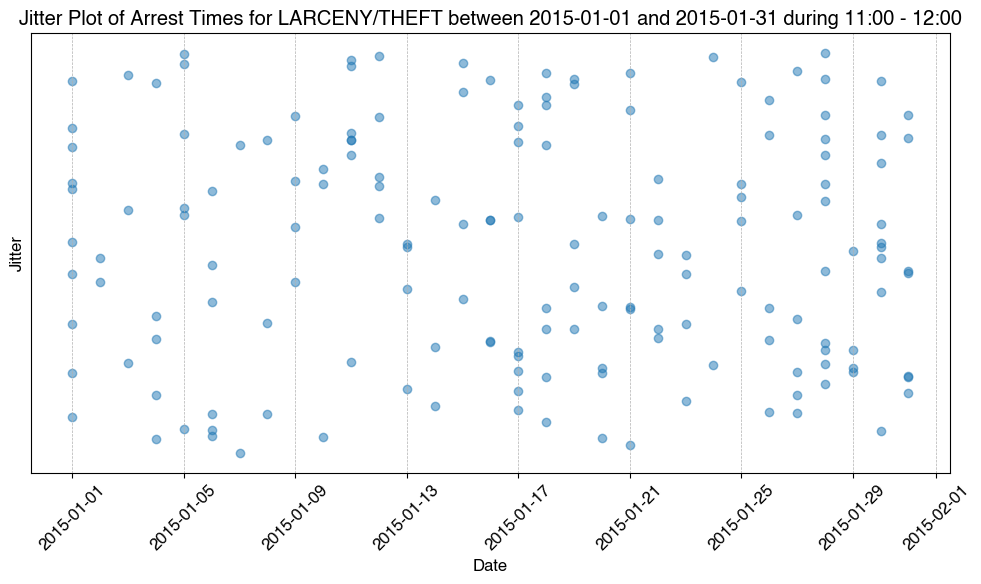

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

crime_type = 'LARCENY/THEFT'
start_date = pd.to_datetime('2015-01-01').strftime(format='%Y-%m-%d')
end_date = pd.to_datetime('2015-01-31').strftime(format='%Y-%m-%d')
hour_of_interest = 11


# Filter for a specific crime_type and date range (start_date to end_date)
filtered_df = df[(df['Category'] == crime_type) & (df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

filtered_df['Hour'] = filtered_df['Time'].str.split(':').str[0].astype(int)
filtered_df = filtered_df.loc[filtered_df['Hour'] == hour_of_interest]

#Create jitter
jitter = np.random.uniform(-0.2, 0.2, size=len(filtered_df))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Date'], jitter, alpha=0.5)
plt.title(f"Jitter Plot of Arrest Times for {crime_type} between {start_date} and {end_date} during {hour_of_interest}:00 - {hour_of_interest+1}:00")
plt.xlabel('Date')
plt.yticks([])
plt.ylabel('Jitter')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


### Ex 1.2 GPS Histogram

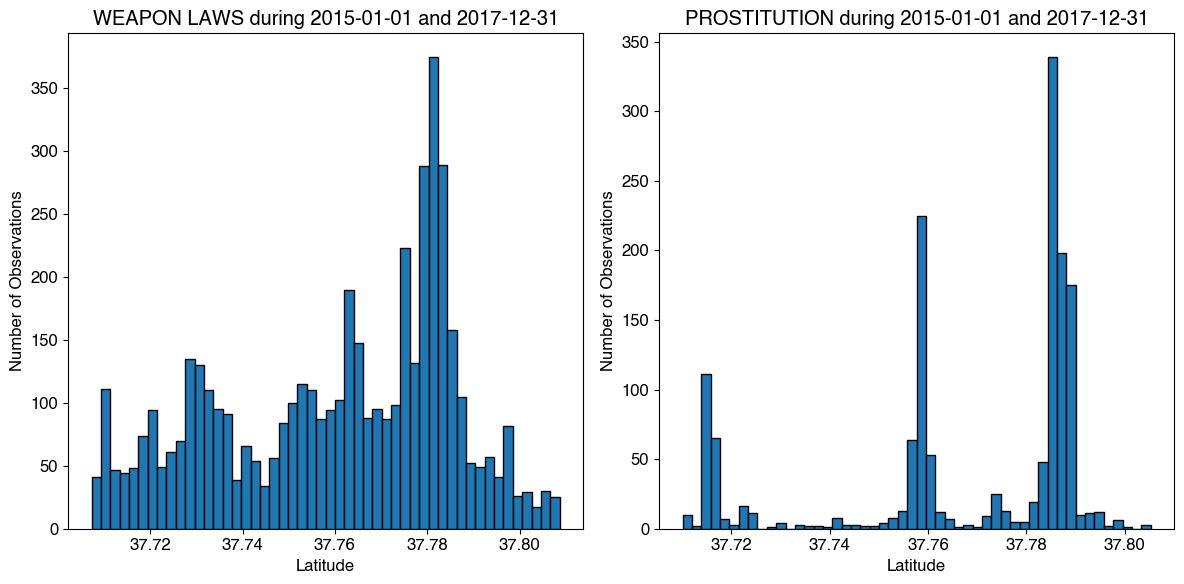

In [8]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Choose two crime types
crime_type1 = 'WEAPON LAWS'
crime_type2 = 'PROSTITUTION'

# Choose time intervals
start_date = '2015-01-01'
end_date = '2017-12-31'

# Filter data for the crime types and time interval
filtered_df1 = df[(df['Category'] == crime_type1) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]
filtered_df2 = df[(df['Category'] == crime_type2) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Extract latitudes and create histograms using numpy.histogram
latitudes1 = filtered_df1['Y'].values
latitudes2 = filtered_df2['Y'].values

counts1, bin_edges1 = np.histogram(latitudes1, bins=50)
counts2, bin_edges2 = np.histogram(latitudes2, bins=50)

# Plotting the histograms
plt.figure(figsize=(12, 6))

# Histogram for the first crime type
plt.subplot(1, 2, 1)
plt.bar(bin_edges1[:-1], counts1, width=np.diff(bin_edges1), edgecolor='black')
plt.title(f'{crime_type1} during {start_date} and {end_date}')
plt.xlabel('Latitude')
plt.ylabel('Number of Observations')

# Histogram for the second crime type
plt.subplot(1, 2, 2)
plt.bar(bin_edges2[:-1], counts2, width=np.diff(bin_edges2), edgecolor='black')
plt.title(f'{crime_type2} during {start_date} and {end_date}')
plt.xlabel('Latitude')
plt.ylabel('Number of Observations')

plt.tight_layout()
plt.show()


In [16]:
df['X'].head()

0   -122.420084
1   -120.500000
2   -120.500000
3   -122.436220
4   -122.410541
Name: X, dtype: float64

### Ex 1.3 KDEs 

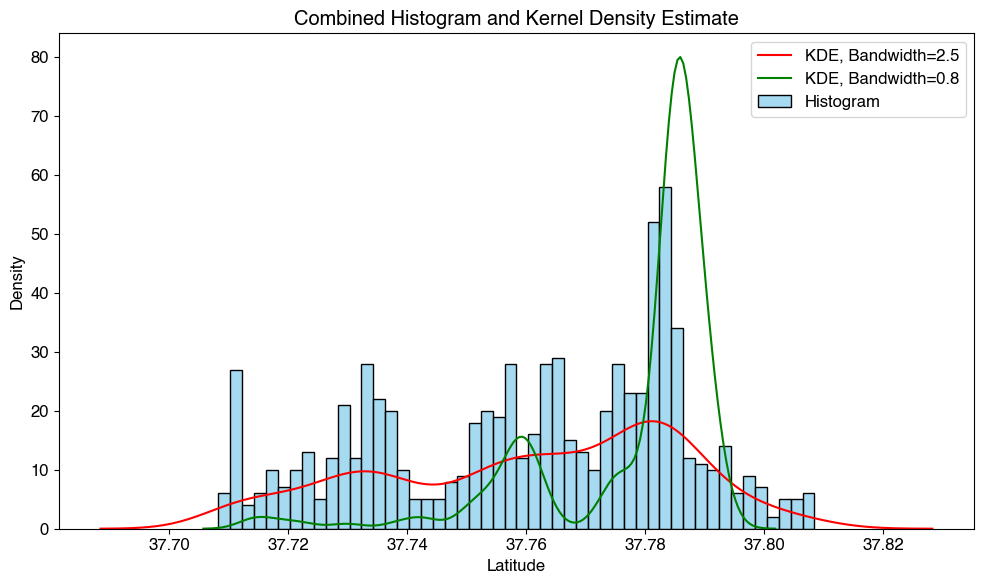

In [10]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Choose two crime types
crime_type1 = 'WEAPON LAWS'
crime_type2 = 'PROSTITUTION'

# Choose time intervals
start_date = '2015-01-01'
end_date = '2015-06-30'

# Filter the DataFrame for the two crime types
df_crime1 = df[(df['Category'] == crime_type1) & (df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['Y'] >= 36) & (df['Y'] <= 38)]
df_crime2 = df[(df['Category'] == crime_type2) & (df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['Y'] >= 36) & (df['Y'] <= 38)]

# Use seaborn to plot histograms and KDEs for the selected crime types
plt.figure(figsize=(10, 6))

# Histogram and KDE for the first crime type
sns.histplot(df_crime1['Y'], color="skyblue", label="Histogram", kde=False, bins=50)
sns.kdeplot(df_crime1['Y'], color="red", label="KDE, Bandwidth=2.5", bw_adjust=1)

# Histogram and KDE for the second crime type (with adjusted bandwidth)
# Uncomment the next line to include a second KDE with different bandwidth
sns.kdeplot(df_crime2['Y'], color="green", label="KDE, Bandwidth=0.8", bw_adjust=0.5)

plt.xlabel('Latitude')
plt.ylabel('Density')
plt.title('Combined Histogram and Kernel Density Estimate')
plt.legend()

plt.tight_layout()
plt.show()


### Ex 1.4

## Exrcise Part 2

### Ex 2.1 Propabillity plots Q-Q plots

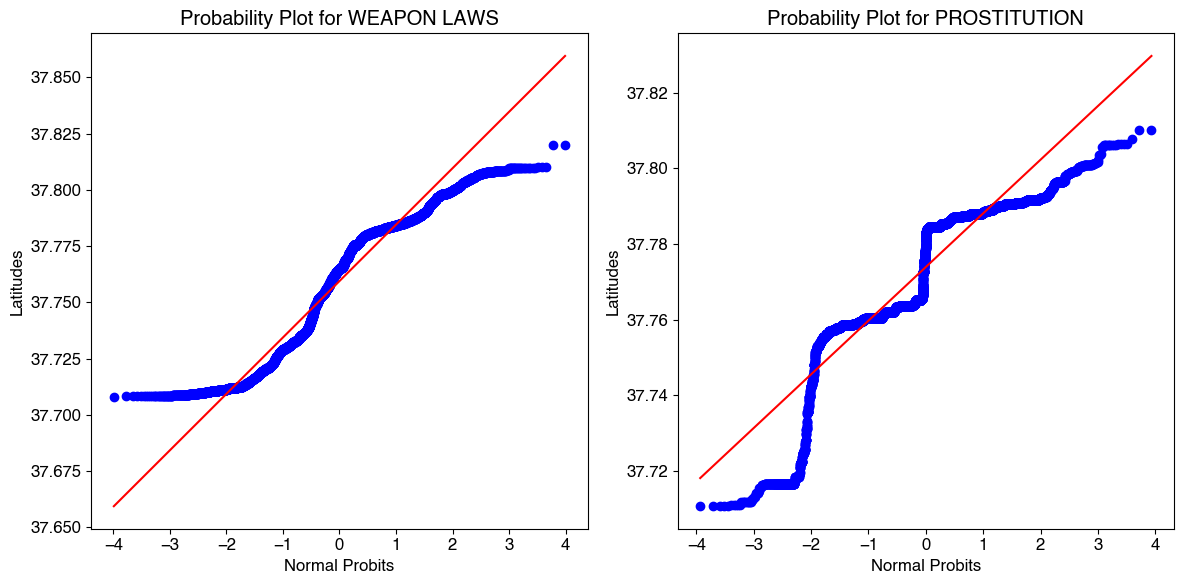

In [11]:
crime_type1 = 'WEAPON LAWS'
crime_type2 = 'PROSTITUTION'

# Filter the DataFrame to get two different crime types
df_crime1 = df[(df['Category'] == crime_type1) & (df['Y'] >= 36) & (df['Y'] <= 38)]
df_crime2 = df[(df['Category'] == crime_type2) & (df['Y'] >= 36) & (df['Y'] <= 38)]

plt.figure(figsize=(12, 6))

# Probability plot for the first crime type
plt.subplot(1, 2, 1)
stats.probplot(df_crime1['Y'], dist="norm", plot=plt)
plt.title(f'Probability Plot for {crime_type1}')
plt.xlabel('Normal Probits')
plt.ylabel('Latitudes')

# Probability plot for the second crime type
plt.subplot(1, 2, 2)
stats.probplot(df_crime2['Y'], dist="norm", plot=plt)
plt.title(f'Probability Plot for {crime_type2}')
plt.xlabel('Normal Probits')
plt.ylabel('Latitudes')

plt.tight_layout()
plt.show()


### Ex 2.2.1

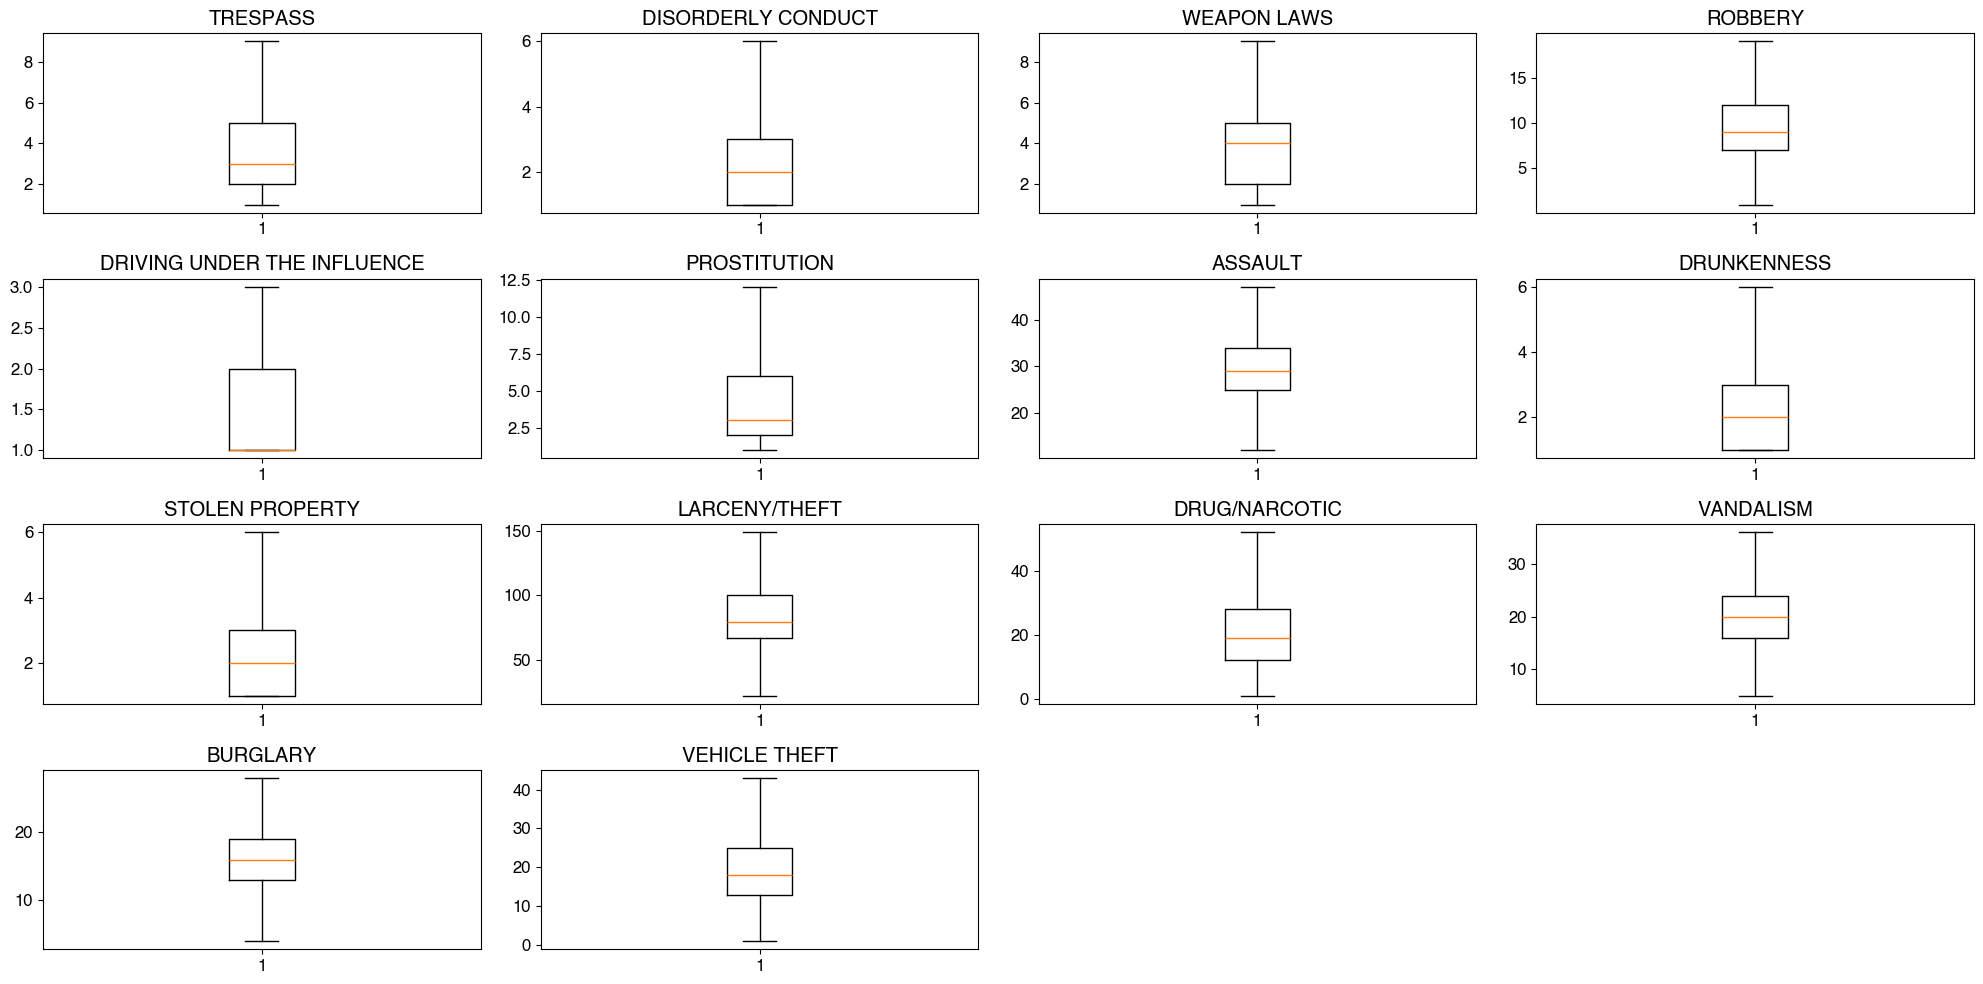

In [12]:
focuscrimes = {
    'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 
    'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 
    'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'
}

# Filter the DataFrame to only include focus crimes
df_focus = df[df['Category'].isin(focuscrimes)].copy()

# Convert 'Date' column to datetime objects if not already done
df_focus['Date'] = pd.to_datetime(df_focus['Date'])

# Group by 'Category' and 'Date' and count the number of crimes per day
daily_crimes = df_focus.groupby(['Category', df_focus['Date'].dt.date]).size().reset_index(name='Counts')

# Create a box plot for each crime category
plt.figure(figsize=(20, 10))

# Use a loop to create a boxplot for each category
for i, crime in enumerate(focuscrimes):
    plt.subplot(4, 4, i+1)
    subset = daily_crimes[daily_crimes['Category'] == crime]
    plt.boxplot(subset['Counts'], showfliers=False)  # Set 'showfliers=False' to hide outliers
    plt.title(crime)

plt.tight_layout()
plt.show()


### Ex 2.2.2 box-and whiskers plot showing the mean, median, quantiles

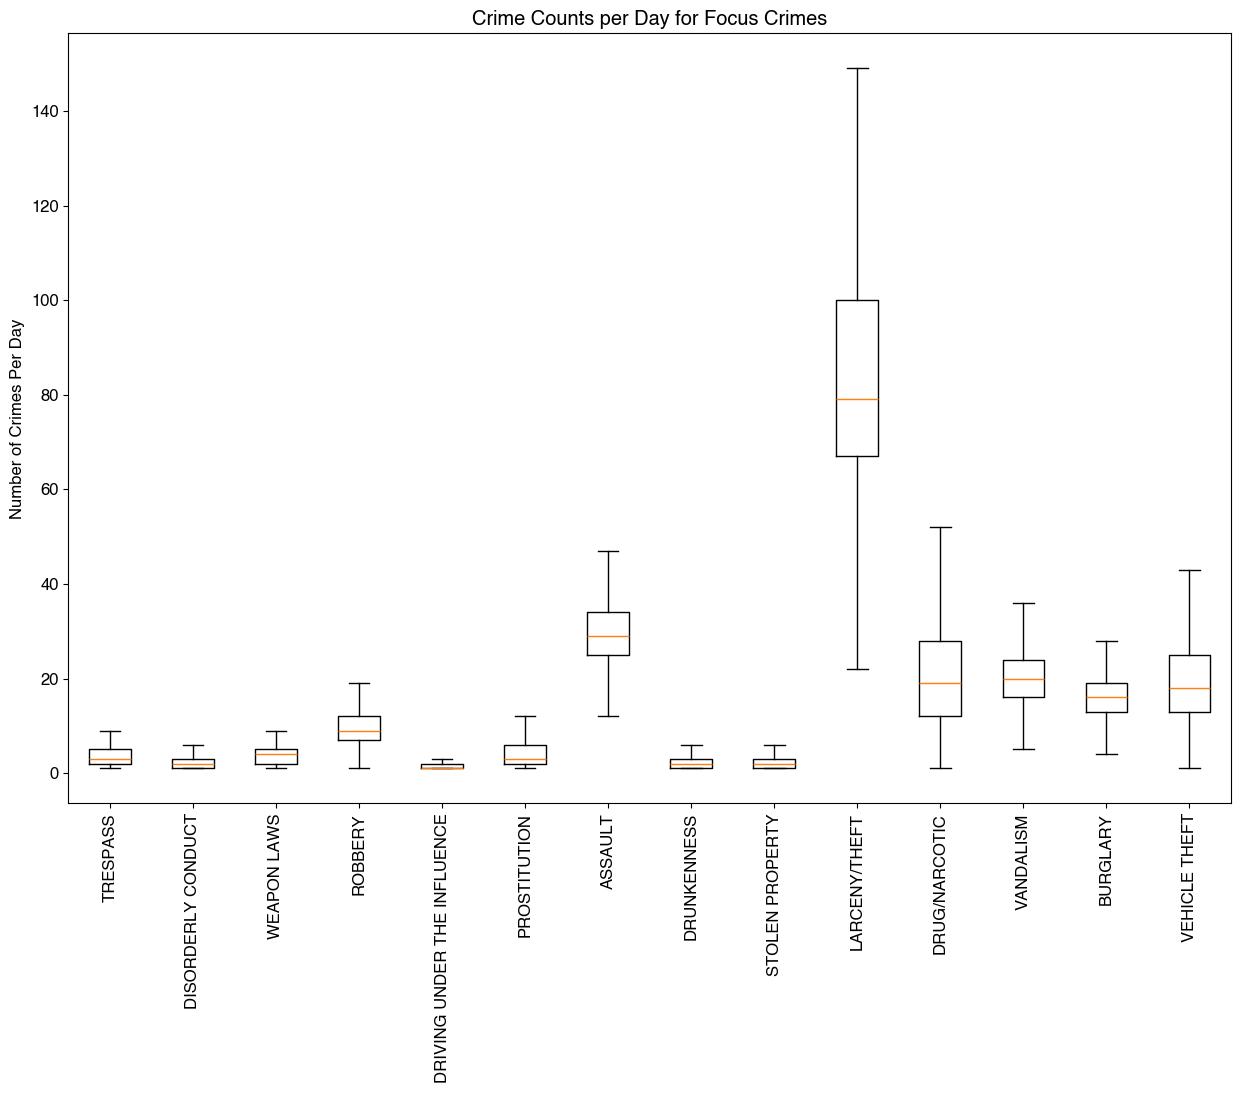

In [13]:
focuscrimes = {
    'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 
    'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 
    'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'
}

# Filter the DataFrame to only include focus crimes
df_focus = df[df['Category'].isin(focuscrimes)].copy()

# Group by 'Category' and 'Date' and count the number of crimes per day
daily_crimes = df_focus.groupby(['Category', df_focus['Date'].dt.date]).size().reset_index(name='Counts')

# Prepare data for the boxplot
data_to_plot = [daily_crimes[daily_crimes['Category'] == crime]['Counts'].values for crime in focuscrimes]

# Create a box-and-whiskers plot for all focus crime types
plt.figure(figsize=(15, 10))
plt.boxplot(data_to_plot, labels=focuscrimes, showfliers=False)
plt.xticks(rotation=90)
plt.ylabel('Number of Crimes Per Day')
plt.title('Crime Counts per Day for Focus Crimes')

plt.show()

### Ex 2.2.3: What does this plot reveal that you can't see in the plots from last time?

In general it is easier to compare the crimes, but less detailed.

## Exercise 3

### Ex 3.1

In [14]:
focuscrimes = {
    'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 
    'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 
    'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'
}

df_focus = df[df['Category'].isin(focuscrimes)].copy()

# Convert time-of-day to a fractional hour
def time_to_fractional_hour(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60

df_focus['TimeFractional'] = df_focus['Time'].apply(time_to_fractional_hour)

# Calculate the average time-of-day for each focus-crime category
average_times = df_focus.groupby('Category')['TimeFractional'].mean()

# Optional: Convert the average times back to a more readable format if desired
def fractional_hour_to_time(fractional_hour):
    hours = int(fractional_hour)
    minutes = int((fractional_hour - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

average_times_readable = average_times.apply(fractional_hour_to_time)

print(average_times_readable)


Category
ASSAULT                        13:08
BURGLARY                       13:06
DISORDERLY CONDUCT             10:58
DRIVING UNDER THE INFLUENCE    11:40
DRUG/NARCOTIC                  14:28
DRUNKENNESS                    13:13
LARCENY/THEFT                  14:42
PROSTITUTION                   13:42
ROBBERY                        13:23
STOLEN PROPERTY                13:28
TRESPASS                       12:23
VANDALISM                      13:54
VEHICLE THEFT                  14:56
WEAPON LAWS                    13:53
Name: TimeFractional, dtype: object


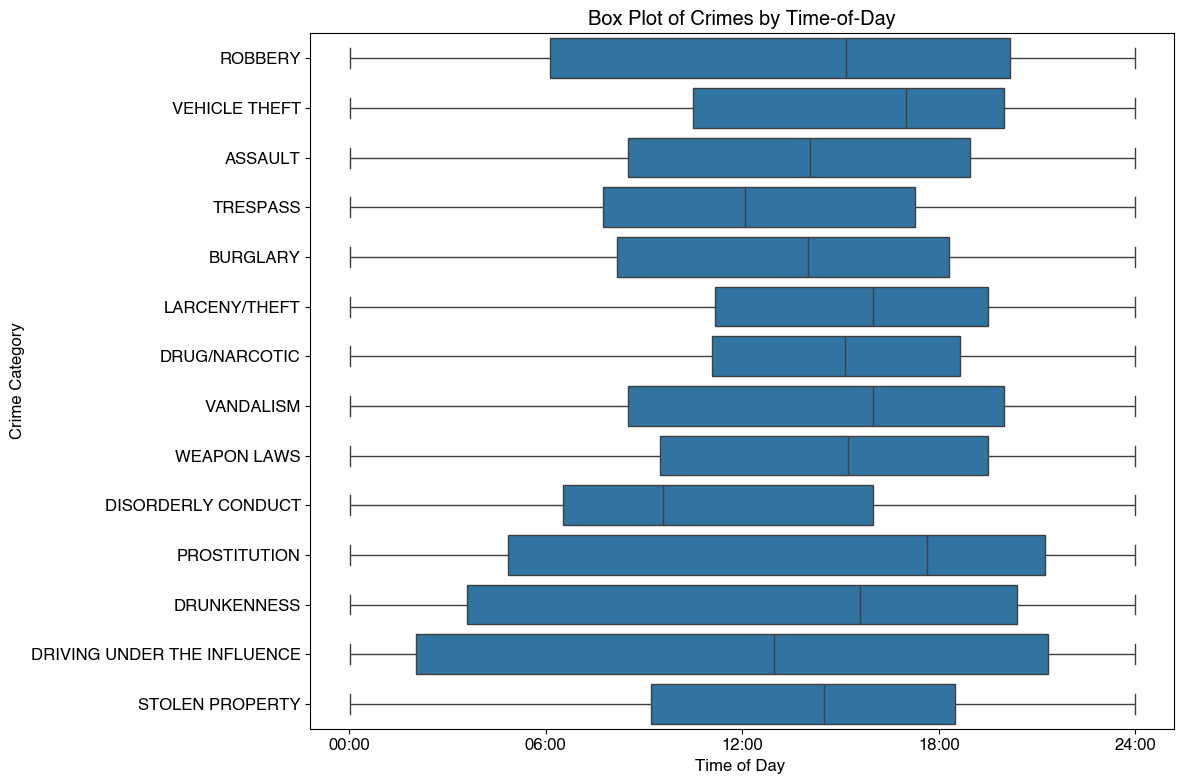

In [15]:
# Create box plots
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(x='TimeFractional', y='Category', data=df_focus, orient='h')
plt.title('Box Plot of Crimes by Time-of-Day')
plt.xlabel('Time of Day ')
plt.ylabel('Crime Category')

# Optional: Adjust x-axis to show readable time format
plt.xticks(ticks=[0, 6, 12, 18, 24], labels=['00:00', '06:00', '12:00', '18:00', '24:00'])

plt.tight_layout()  # Adjust the layout to make room for the labels
plt.show()